In [1]:

%run "import_ntbk.ipynb"

In [ ]:
# %run "Explotary_Data_Analysis_ntbk.ipynb"
# please go to the Exploratory_Data_Analysis_ntbk notebook for better visualization  and notebook readinng flow 

In [2]:
# 1.Load data 

df = pd.read_csv('DS_assessment.csv')   

print("Original Data")
df.head()

Original Data


,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,Undergrad,0,1,0,NO,NO
1,2,45,19,34.0,90089,3.0,1.5,Undergrad,0,1,0,NO,NO
2,3,39,15,11.0,94720,1.0,1.0,Undergrad,0,0,0,NO,NO
3,4,35,9,NaN,94112,1.0,2.7,Graduate,0,0,0,NO,NO
4,5,35,8,45.0,91330,4.0,1.0,Graduate,0,0,0,NO,NO


In [3]:
## 2. Data information at a glance 
# df.info()
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,5000.0,NaN,NaN,NaN,2500.5,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,NaN,NaN,NaN,45.3384,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,NaN,NaN,NaN,20.1046,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,4980.0,NaN,NaN,NaN,73.840361,46.0793,8.0,39.0,64.0,98.0,224.0
Postal Code,5000.0,NaN,NaN,NaN,93152.503,2121.852197,9307.0,91911.0,93437.0,94608.0,96651.0
Family Size,4991.0,NaN,NaN,NaN,2.396714,1.148189,1.0,1.0,2.0,3.0,4.0
CCAvgSpending,5000.0,NaN,NaN,NaN,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000,3,Undergrad,2096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mortgage,5000.0,NaN,NaN,NaN,56.4988,101.713802,0.0,0.0,0.0,101.0,635.0
Investment Account,5000.0,NaN,NaN,NaN,0.1044,0.305809,0.0,0.0,0.0,0.0,1.0


In [13]:
# 3. Data cleaning & data sanity checks

df.columns = [c.strip() for c in df.columns]

# Change string categorical data into Numerical category data  YES : 1 & NO :0
# Example: if Personal Loan is 'Personal Loan' with YES/NO -> map to 1/0


if df['Personal Loan'].dtype == object:
    df['Personal Loan'] = df['Personal Loan'].str.strip().str.lower().map({'yes':1, 'no':0, 'y':1, 'n':0})

# Convert InternetBanking to binary if string
if df['InternetBanking'].dtype == object:
    df['InternetBanking'] = df['InternetBanking'].str.strip().str.lower().map({'yes':1, 'no':0, 'y':1, 'n':0})

# Ensure Investment Account and Deposit Account numeric 0/1
for col in ['Investment Account', 'Deposit Account']:
    if df[col].dtype == object:
        df[col] = df[col].astype(str).str.strip().map({'1':1,'0':0,'yes':1,'no':0,'y':1,'n':0}).astype(float)

edu_map = {
    'Undergrad': 1,
    'Graduate': 2,
    'Advanced Degree': 3
}
df['Education'] = df['Education'].map(edu_map).astype(int)


# Check missing
# df.isna().sum()
df

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,Personal Loan
0,1,25,1,49.0,91107,4.0,1.6,1,0,1,0,0,0
1,2,45,19,34.0,90089,3.0,1.5,1,0,1,0,0,0
2,3,39,15,11.0,94720,1.0,1.0,1,0,0,0,0,0
3,4,35,9,NaN,94112,1.0,2.7,2,0,0,0,0,0
4,5,35,8,45.0,91330,4.0,1.0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40.0,92697,1.0,1.9,3,0,0,0,1,0
4996,4997,30,4,15.0,92037,4.0,0.4,1,85,0,0,1,0
4997,4998,63,39,24.0,93023,2.0,0.3,3,0,0,0,0,0
4998,4999,65,40,49.0,90034,3.0,0.5,2,0,0,0,1,0


In [14]:

## 4. Data enrichment and create more columns for feature enrichments


# df = pd.read_csv('DS_assessment.csv')
df['Income'] = df['Income'] * 1000
df['Mortgage'] = df['Mortgage'] * 1000
df['CCAvgSpending'] = df['CCAvgSpending'] * 1000

# Monthly income
df['MonthlyIncome'] = df['Income'] / 12

# Spending ratio (CC spending per month vs monthly income)
df['SpendingCCToIncomeRatio'] = (df['CCAvgSpending'] / df['MonthlyIncome']) * 100

df = df[['ID', 'Age', 'Experience', 'Income', 'Postal Code', 'Family Size',
       'CCAvgSpending', 'Education', 'Mortgage', 'Investment Account',
       'Deposit Account', 'InternetBanking', 'MonthlyIncome', 
       'SpendingCCToIncomeRatio','Personal Loan', ]]
df



,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,MonthlyIncome,SpendingCCToIncomeRatio,Personal Loan
0,1,25,1,49000.0,91107,4.0,1600.0,1,0,1,0,0,4083.333333,39.183673,0
1,2,45,19,34000.0,90089,3.0,1500.0,1,0,1,0,0,2833.333333,52.941176,0
2,3,39,15,11000.0,94720,1.0,1000.0,1,0,0,0,0,916.666667,109.090909,0
3,4,35,9,NaN,94112,1.0,2700.0,2,0,0,0,0,NaN,NaN,0
4,5,35,8,45000.0,91330,4.0,1000.0,2,0,0,0,0,3750.000000,26.666667,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40000.0,92697,1.0,1900.0,3,0,0,0,1,3333.333333,57.000000,0
4996,4997,30,4,15000.0,92037,4.0,400.0,1,85000,0,0,1,1250.000000,32.000000,0
4997,4998,63,39,24000.0,93023,2.0,300.0,3,0,0,0,0,2000.000000,15.000000,0
4998,4999,65,40,49000.0,90034,3.0,500.0,2,0,0,0,1,4083.333333,12.244898,0


In [15]:
## 5. checks final output after data procesing 

df.head(12)

,ID,Age,Experience,Income,Postal Code,Family Size,CCAvgSpending,Education,Mortgage,Investment Account,Deposit Account,InternetBanking,MonthlyIncome,SpendingCCToIncomeRatio,Personal Loan
0,1,25,1,49000.0,91107,4.0,1600.0,1,0,1,0,0,4083.333333,39.183673,0
1,2,45,19,34000.0,90089,3.0,1500.0,1,0,1,0,0,2833.333333,52.941176,0
2,3,39,15,11000.0,94720,1.0,1000.0,1,0,0,0,0,916.666667,109.090909,0
3,4,35,9,NaN,94112,1.0,2700.0,2,0,0,0,0,NaN,NaN,0
4,5,35,8,45000.0,91330,4.0,1000.0,2,0,0,0,0,3750.000000,26.666667,0
5,6,37,13,29000.0,92121,4.0,400.0,2,155000,0,0,1,2416.666667,16.551724,0
6,7,53,27,72000.0,91711,2.0,1500.0,2,0,0,0,1,6000.000000,25.000000,0
7,8,50,24,22000.0,93943,1.0,300.0,3,0,0,0,0,1833.333333,16.363636,0
8,9,35,10,81000.0,90089,3.0,600.0,2,104000,0,0,1,6750.000000,8.888889,0
9,10,34,9,180000.0,93023,1.0,8900.0,3,0,0,0,0,15000.000000,59.333333,1


In [16]:
# 6 Create features, target data and remove unused columns 

TARGET = 'Personal Loan'
ID_COL = 'ID' if 'ID' in df.columns else None

# Drop ID and Postal Code - doesnt have relevant to the dataset
drop_cols = []
if ID_COL: drop_cols.append(ID_COL)
if 'Postal Code' in df.columns:
    drop_cols.append('Postal Code')

X = df.drop(columns = drop_cols + [TARGET])
y = df[TARGET].astype(int)


In [17]:
# 7 Preprocessing pipeline
# numeric and categorical separation

numeric_features = [c for c in X.columns if X[c].dtype in [np.float64, np.int64, 'float64','int64'] and c not in ['Investment Account','Deposit Account','InternetBanking', 'Education']]
binary_features = [c for c in ['Investment Account','Deposit Account','InternetBanking'] if c in X.columns]
categorical_features = [c for c in X.columns if c not in numeric_features + binary_features]

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

binary_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent'))
    # already 0/1 typically; no scaling necessary
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('bin', binary_transformer, binary_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# Quick check of feature lists
numeric_features, binary_features, categorical_features


(['Age',
  'Experience',
  'Income',
  'Family Size',
  'CCAvgSpending',
  'Mortgage',
  'MonthlyIncome',
  'SpendingCCToIncomeRatio'],
 ['Investment Account', 'Deposit Account', 'InternetBanking'],
 ['Education'])

In [18]:
# 8. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, random_state=42)

print("Train target distribution:", y_train.value_counts(normalize=True))
print("Test target distribution:", y_test.value_counts(normalize=True))


Train target distribution: Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64
Test target distribution: Personal Loan
0    0.904
1    0.096
Name: proportion, dtype: float64


In [19]:
# 9  Handling class imbalance - SMOTE on training only
# Use SMOTE as target is significantly imbalanced because the data provide is only 9.6% that is positive 


print("Overall positive rate:", y.mean())
use_smote = True
if use_smote:
    #  preprocess first then apply SMOTE to numeric array.
    
    X_train_prep = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)

    print("Preprocessed shapes:", X_train_prep.shape, X_test_prep.shape)

    sm = SMOTE(random_state=42, )
    X_train_res, y_train_res = sm.fit_resample(X_train_prep, y_train)
    print("After SMOTE, class distribution:", pd.Series(y_train_res).value_counts())
else:
    X_train_res = preprocessor.fit_transform(X_train)
    X_test_prep = preprocessor.transform(X_test)
    y_train_res = y_train

Overall positive rate: 0.096
Preprocessed shapes: (3750, 14) (1250, 14)
After SMOTE, class distribution: Personal Loan
1    3390
0    3390
Name: count, dtype: int64


In [20]:


# 10. Modelling: Logistic Regression

log_clf = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

# When using SMOTE we already have arrays, else use pipelines
if use_smote:
    log_clf.fit(X_train_res, y_train_res)
    y_pred_log = log_clf.predict(X_test_prep)
    y_prob_log = log_clf.predict_proba(X_test_prep)[:,1]
else:
    pipe_log = Pipeline(steps=[('preprocessor', preprocessor),
                               ('clf', log_clf)])
    pipe_log.fit(X_train, y_train)
    y_pred_log = pipe_log.predict(X_test)
    y_prob_log = pipe_log.predict_proba(X_test)[:,1]

# 11. Random Forest 
rf_clf = RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42, class_weight='balanced')
if use_smote:
    rf_clf.fit(X_train_res, y_train_res)
    y_pred_rf = rf_clf.predict(X_test_prep)
    y_prob_rf = rf_clf.predict_proba(X_test_prep)[:, 1]
else:
    pipe_rf = Pipeline(steps=[('preprocessor', preprocessor), ('clf', rf_clf)])
    pipe_rf.fit(X_train, y_train)
    y_pred_rf = pipe_rf.predict(X_test)
    y_prob_rf = pipe_rf.predict_proba(X_test)[:, 1]

# 12. XGBoost Classifier 
xgb_clf = XGBClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)
if use_smote:
    xgb_clf.fit(X_train_res, y_train_res)
    y_pred_xgb = xgb_clf.predict(X_test_prep)
    y_prob_xgb = xgb_clf.predict_proba(X_test_prep)[:, 1]
else:
    pipe_xgb = Pipeline(steps=[('preprocessor', preprocessor), ('clf', xgb_clf)])
    pipe_xgb.fit(X_train, y_train)
    y_pred_xgb = pipe_xgb.predict(X_test)
    y_prob_xgb = pipe_xgb.predict_proba(X_test)[:, 1]

# 13. K-Nearest Neighbors 
knn_clf = KNeighborsClassifier(n_neighbors=7)
if use_smote:
    knn_clf.fit(X_train_res, y_train_res)
    y_pred_knn = knn_clf.predict(X_test_prep)
    y_prob_knn = knn_clf.predict_proba(X_test_prep)[:, 1]
else:
    pipe_knn = Pipeline(steps=[('preprocessor', preprocessor), ('clf', knn_clf)])
    pipe_knn.fit(X_train, y_train)
    y_pred_knn = pipe_knn.predict(X_test)
    y_prob_knn = pipe_knn.predict_proba(X_test)[:, 1]

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:199: UserWarning: [15:48:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [21]:

# 14. Model Comparison 
models = {
    "Logistic Regression": (y_pred_log, y_prob_log),
    "Random Forest": (y_pred_rf, y_prob_rf),
    "XGBoost": (y_pred_xgb, y_prob_xgb),
    "KNN": (y_pred_knn, y_prob_knn)
}

results = []
for name, (y_pred, y_prob) in models.items():
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, zero_division=0),
        "Recall": recall_score(y_test, y_pred, zero_division=0),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    })

results_df = pd.DataFrame(results).sort_values(by="ROC-AUC", ascending=False)
display(results_df)



,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
2,XGBoost,0.9880,0.933884,0.941667,0.937759,0.998879
1,Random Forest,0.9872,0.926230,0.941667,0.933884,0.998831
0,Logistic Regression,0.9096,0.516588,0.908333,0.658610,0.968304
3,KNN,0.9576,0.718954,0.916667,0.805861,0.967942


In [ ]:
# 15 Evaluation function
def evaluate_model(y_true, y_pred, y_prob, model_name='model'):
    print(f"=== {model_name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, zero_division=0))
    print("Recall:", recall_score(y_true, y_pred, zero_division=0))
    print("F1:", f1_score(y_true, y_pred, zero_division=0))
    print("ROC AUC:", roc_auc_score(y_true, y_prob))
    print("\nClassification report:\n", classification_report(y_true, y_pred, zero_division=0))
    cm = confusion_matrix(y_true, y_pred)
    display(pd.DataFrame(cm, index=['Actual 0','Actual 1'], columns=['Pred 0','Pred 1']))
    # ROC curve
    fpr, tpr, _ = roc_curve(y_true, y_prob)
    plt.figure()
    plt.plot(fpr,tpr,label=f"{model_name} (AUC={roc_auc_score(y_true,y_prob):.3f})")
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC - {model_name}')
    plt.legend()
    plt.show()


=== Logistic Regression ===
Accuracy: 0.9096
Precision: 0.5165876777251185
Recall: 0.9083333333333333
F1: 0.6586102719033232
ROC AUC: 0.9683038348082597

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.91      0.95      1130
           1       0.52      0.91      0.66       120

    accuracy                           0.91      1250
   macro avg       0.75      0.91      0.80      1250
weighted avg       0.94      0.91      0.92      1250



,Pred 0,Pred 1
Actual 0,1028,102
Actual 1,11,109


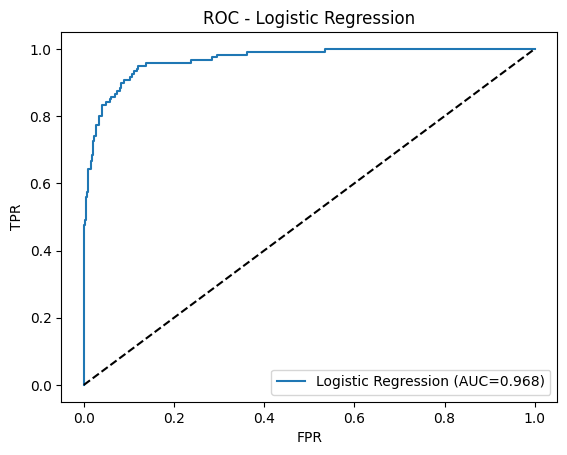

=== Random Forest ===
Accuracy: 0.9872
Precision: 0.9262295081967213
Recall: 0.9416666666666667
F1: 0.9338842975206612
ROC AUC: 0.9988311209439528

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.94      0.93       120

    accuracy                           0.99      1250
   macro avg       0.96      0.97      0.96      1250
weighted avg       0.99      0.99      0.99      1250



,Pred 0,Pred 1
Actual 0,1121,9
Actual 1,7,113


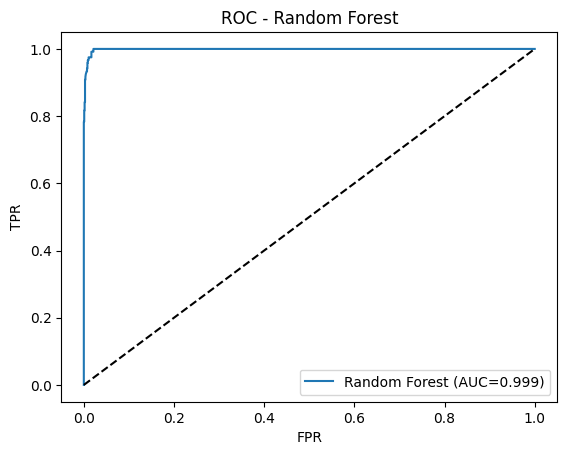

=== XGBoost ===
Accuracy: 0.988
Precision: 0.9338842975206612
Recall: 0.9416666666666667
F1: 0.9377593360995851
ROC AUC: 0.9988790560471976

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.93      0.94      0.94       120

    accuracy                           0.99      1250
   macro avg       0.96      0.97      0.97      1250
weighted avg       0.99      0.99      0.99      1250



,Pred 0,Pred 1
Actual 0,1122,8
Actual 1,7,113


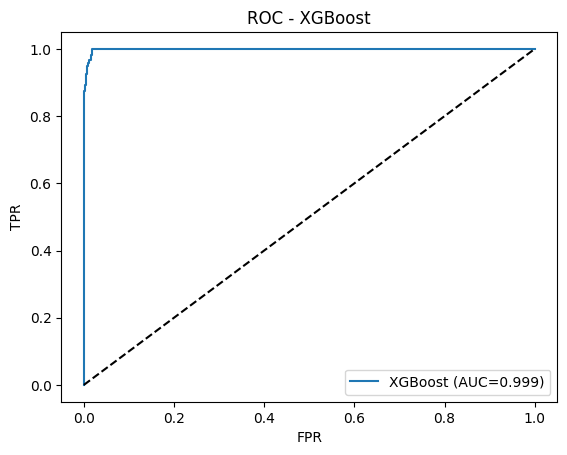

=== KNN ===
Accuracy: 0.9576
Precision: 0.7189542483660131
Recall: 0.9166666666666666
F1: 0.8058608058608059
ROC AUC: 0.9679424778761063

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.96      0.98      1130
           1       0.72      0.92      0.81       120

    accuracy                           0.96      1250
   macro avg       0.85      0.94      0.89      1250
weighted avg       0.96      0.96      0.96      1250



,Pred 0,Pred 1
Actual 0,1087,43
Actual 1,10,110


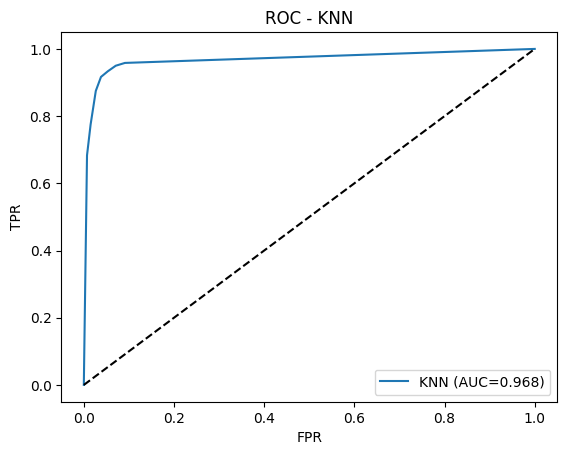

In [ ]:
# 16 Evaluation of models details evaluation and graph runs 

evaluate_model(y_test, y_pred_log, y_prob_log, 'Logistic Regression')
evaluate_model(y_test, y_pred_rf, y_prob_rf, 'Random Forest')
evaluate_model(y_test, y_pred_xgb, y_prob_xgb, 'XGBoost')
evaluate_model(y_test, y_pred_knn, y_prob_knn, 'KNN')


In [23]:
# 17 Feature importance (Random Forest) & Permutation importance (both)
# If using preprocessing and SMOTE we used arrays; we need feature names from preprocessor

# Build feature names function
def get_feature_names(preprocessor):
    """Returns feature names after ColumnTransformer / OneHotEncoder."""
    names = []
    # numeric
    if 'num' in preprocessor.named_transformers_:
        names.extend(numeric_features)
    # binary
    names.extend(binary_features)
    # categorical (onehot)
    if 'cat' in preprocessor.named_transformers_:
        ohe = preprocessor.named_transformers_['cat'].named_steps['onehot']
        cat_cols = categorical_features
        try:
            ohe_names = ohe.get_feature_names_out(cat_cols)
        except:
            ohe_names = ohe.get_feature_names(cat_cols)
        names.extend(list(ohe_names))
    return names

feature_names = get_feature_names(preprocessor)
len(feature_names)


14

Income                     0.267298
MonthlyIncome              0.258157
CCAvgSpending              0.118307
Education_1                0.077612
Family Size                0.068976
Deposit Account            0.062098
SpendingCCToIncomeRatio    0.041319
Education_3                0.025176
Education_2                0.024940
Mortgage                   0.013814
Experience                 0.012878
Age                        0.012682
InternetBanking            0.012585
Investment Account         0.004158
dtype: float64

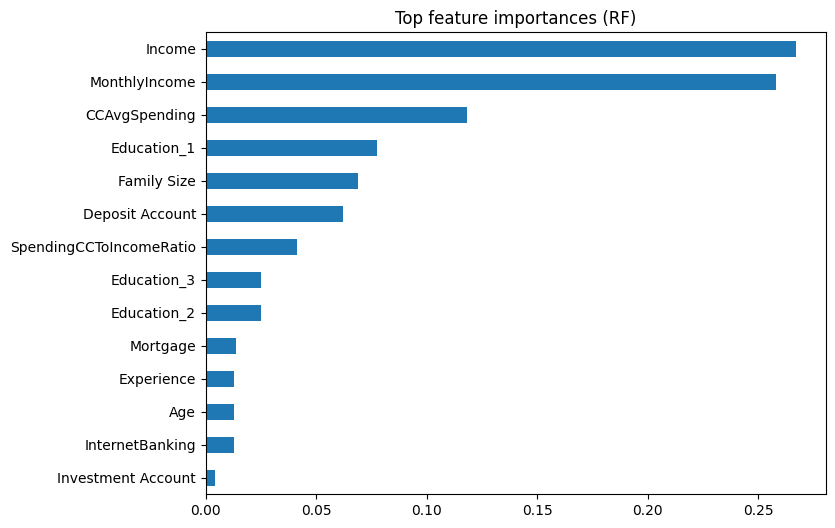

Education_1                0.07752
Family Size                0.05948
Income                     0.02980
MonthlyIncome              0.02332
CCAvgSpending              0.01872
Deposit Account            0.00196
Education_3                0.00116
Education_2                0.00104
SpendingCCToIncomeRatio    0.00016
Investment Account        -0.00012
Mortgage                  -0.00036
InternetBanking           -0.00056
Age                       -0.00112
Experience                -0.00188
dtype: float64

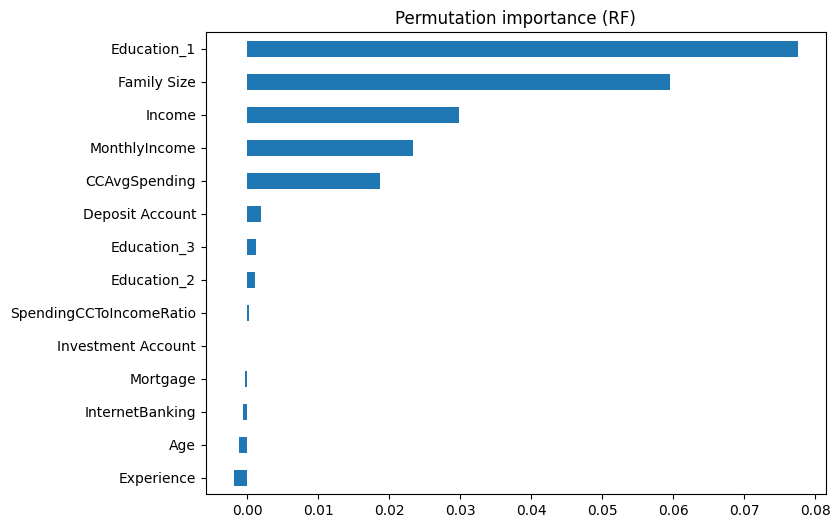

In [ ]:
#18  For RandomForest  Feature Importance 
if use_smote:
    # feature importance
    importances = rf_clf.feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    display(fi)
    fi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Top feature importances (RF)')
    plt.show()

    # Permutation importance on test set
    r = permutation_importance(rf_clf, X_test_prep, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    pfi = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False).head(20)
    display(pfi)
    pfi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Permutation importance (RF)')
    plt.show()
else:
    # If pipeline used, we must compute permutation importance using pipeline on X_test
    r = permutation_importance(pipe_rf, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    pfi = pd.Series(r.importances_mean, index = get_feature_names(pipe_rf.named_steps['preprocessor'])).sort_values(ascending=False).head(20)
    display(pfi)
    pfi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Permutation importance (RF)')
    plt.show()


MonthlyIncome              0.259595
Income                     0.257520
Education_1                0.176247
Family Size                0.100641
CCAvgSpending              0.051316
Deposit Account            0.032568
Education_3                0.026922
SpendingCCToIncomeRatio    0.025622
Education_2                0.019472
InternetBanking            0.016215
Investment Account         0.011165
Age                        0.009073
Experience                 0.007047
Mortgage                   0.006597
dtype: float32

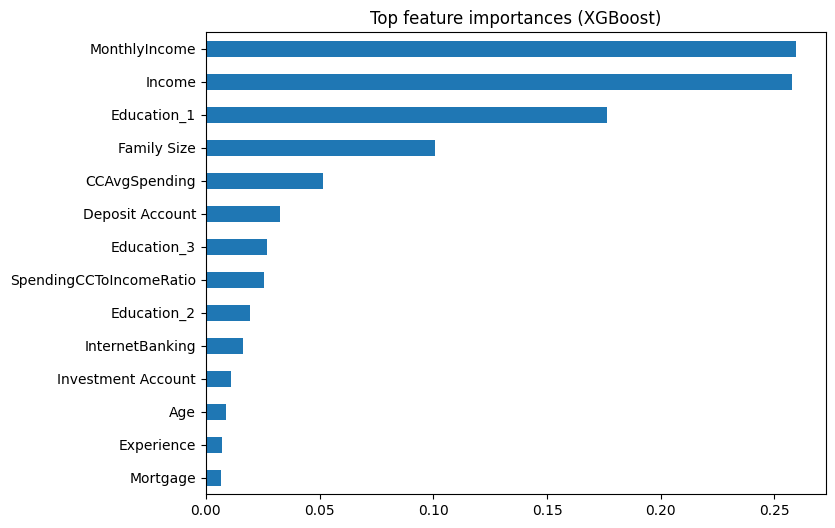

Income                     0.16380
Education_1                0.08260
Family Size                0.06460
CCAvgSpending              0.02436
SpendingCCToIncomeRatio    0.00376
Deposit Account            0.00204
Education_3                0.00172
Education_2                0.00132
Age                        0.00104
InternetBanking            0.00076
Mortgage                   0.00064
Investment Account        -0.00056
Experience                -0.00072
MonthlyIncome             -0.00108
dtype: float64

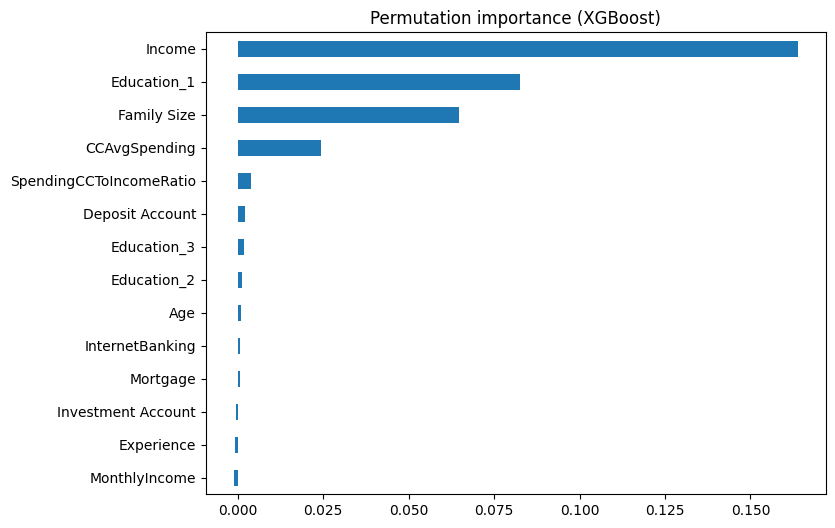

In [ ]:
##19 Feature Importance  XGBoost 

if use_smote:
    # feature importance
    importances = xgb_clf.feature_importances_
    fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)
    display(fi)
    fi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Top feature importances (XGBoost)')
    plt.show()

    # Permutation importance on test set
    r = permutation_importance(xgb_clf, X_test_prep, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    pfi = pd.Series(r.importances_mean, index=feature_names).sort_values(ascending=False).head(20)
    display(pfi)
    pfi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Permutation importance (XGBoost)')
    plt.show()
else:
    # If pipeline used, we must compute permutation importance using pipeline on X_test
    r = permutation_importance(pipe_xgb, X_test, y_test, n_repeats=20, random_state=42, n_jobs=-1)
    pfi = pd.Series(r.importances_mean, index = get_feature_names(pipe_xgb.named_steps['preprocessor'])).sort_values(ascending=False).head(20)
    display(pfi)
    pfi.plot(kind='barh', figsize=(8,6))
    plt.gca().invert_yaxis()
    plt.title('Permutation importance (XGBoost)')
    plt.show()


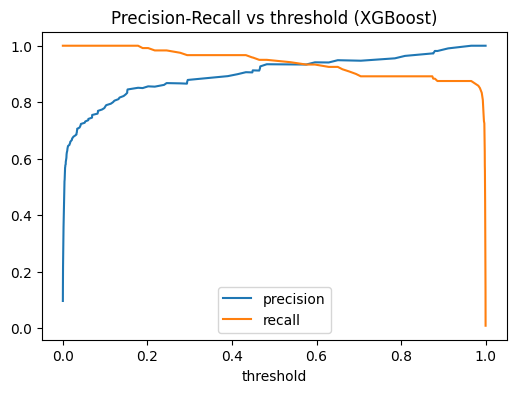

In [24]:
# 20 Threshold tuning (Precision/Recall tradeoff) for business needs
## Selecting XGBoost model as the best model

precision, recall, thresholds = precision_recall_curve(y_test, y_prob_xgb)
# Simple plot
plt.figure(figsize=(6,4))
plt.plot(thresholds, precision[:-1], label='precision')
plt.plot(thresholds, recall[:-1], label='recall')
plt.xlabel('threshold')
plt.legend()
plt.title('Precision-Recall vs threshold (XGBoost)')
plt.show()




In [ ]:
# 21 Save models and artefacts


# joblib.dump(rf_clf, 'rf_clf.joblib')
# joblib.dump(log_clf, 'log_clf.joblib')
joblib.dump(xgb_clf, 'xgb_clf.joblib')
# joblib.dump(knn_clf, 'knn_clf.joblib')
joblib.dump(preprocessor, 'preprocessor.joblib')
print("Saved model files: xgb_clf.joblib, preprocessor.joblib")


Saved model files: xgb_clf.joblib, preprocessor.joblib


In [34]:
# 22. Create a scoring function for new customers

def score_customers(df_new, model_name='xgb'):
    """
    Score new customer data using a trained model and preprocessing pipeline
    Parameters
    df_new : pd.DataFrame
        New raw data, same columns as training dataset (including new engineered columns).
    model_name : str, optional
        Choose between 'xgb', 'rf', 'log', or 'knn'. Default is 'xgb'.

    """
    Xn = df_new.copy()
    
    # Education mapping (ensure consistent encoding)
    if 'Education' in Xn.columns:
        edu_map = {'Undergrad': 1, 'Graduate': 2, 'Advanced Degree': 3}
        Xn['Education'] = Xn['Education'].map(edu_map).fillna(Xn['Education']).astype(float)
    
    # Feature engineeringand enrich data
    if 'Income' in Xn.columns and 'MonthlyIncome' not in Xn.columns:
        Xn['Income'] = Xn['Income'] * 1000
        Xn['Mortgage'] = Xn['Mortgage'] * 1000
        Xn['CCAvgSpending'] = Xn['CCAvgSpending'] * 1000
        Xn['MonthlyIncome'] = Xn['Income'] / 12
        Xn['SpendingCCToIncomeRatio'] = (Xn['CCAvgSpending'] / Xn['MonthlyIncome']) * 100
    
    # handle missing binary columns safely
    for col in ['Investment Account', 'Deposit Account', 'InternetBanking']:
        if col in Xn.columns:
            if Xn[col].dtype == object:
                Xn[col] = Xn[col].astype(str).str.strip().map(
                    {'1': 1, '0': 0, 'yes': 1, 'no': 0, 'y': 1, 'n': 0}
                ).fillna(0).astype(float)
        else:
            Xn[col] = 0
    
    ids = Xn['ID'] if 'ID' in Xn.columns else pd.Series(range(len(Xn)))
    
    # Preprocess new data using trained pipeline ---
    Xn_prep = preprocessor.transform(Xn)
    
    # model 
    model_map = {
        'xgb': xgb_clf,
        'rf': rf_clf,
        'log': log_clf,
        'knn': knn_clf
    }
    
    if model_name not in model_map:
        raise ValueError(f"Invalid model '{model_name}'. Choose from {list(model_map.keys())}")
    
    model = model_map[model_name]
    
    # Predict
    prob = model.predict_proba(Xn_prep)[:, 1]
    pred = (prob >= 0.5).astype(int)
    
    # Create outpu
    out = Xn.copy()
    out['pred_prob'] = prob
    out['pred_label'] = pred
    
    # Sort by probability (highest loan likelihood first)
    out = out.sort_values(by='pred_prob', ascending=False).reset_index(drop=True)
    
    return out

In [35]:
# Testing model 
scored_xgb = score_customers(df.sample(10), model_name='xgb')
scored_rf = score_customers(df.sample(10), model_name='rf')

display(scored_xgb[['ID', 'pred_prob', 'pred_label']])


,ID,pred_prob,pred_label
0,3468,0.998170,1
1,620,0.029003,0
2,3459,0.002434,0
3,410,0.001120,0
4,3077,0.000841,0
5,2076,0.000409,0
6,2836,0.000222,0
7,728,0.000119,0
8,2644,0.000114,0
9,1946,0.000093,0
